In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 610M/612M [00:04<00:00, 181MB/s]
100% 612M/612M [00:04<00:00, 137MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [6]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
print(cur_path)

/content


In [9]:
for i in range(classes):
    path = os.path.join(cur_path,'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [10]:
data = np.array(data)
labels = np.array(labels)

In [12]:
np.save('./train/data', data)
np.save('./train/target', labels)

In [13]:
data = np.load('./train/data.npy')
labels = np.load('./train/target.npy')

In [14]:
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


In [17]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(43, activation = 'softmax'))

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1961/1961 [==============================] - 25s 7ms/step - loss: 1.4044 - accuracy: 0.6292 - val_loss: 0.2167 - val_accuracy: 0.9387
Epoch 2/20
1961/1961 [==============================] - 13s 7ms/step - loss: 0.3832 - accuracy: 0.8890 - val_loss: 0.0993 - val_accuracy: 0.9775
Epoch 3/20
1961/1961 [==============================] - 13s 7ms/step - loss: 0.2566 - accuracy: 0.9281 - val_loss: 0.0508 - val_accuracy: 0.9853
Epoch 4/20
1961/1961 [==============================] - 13s 7ms/step - loss: 0.2172 - accuracy: 0.9397 - val_loss: 0.0398 - val_accuracy: 0.9892
Epoch 5/20
1961/1961 [==============================] - 14s 7ms/step - loss: 0.2108 - accuracy: 0.9413 - val_loss: 0.0627 - val_accuracy: 0.9828
Epoch 6/20
1961/1961 [==============================] - 13s 7ms/step - loss: 0.2018 - accuracy: 0.9461 - val_loss: 0.0484 - val_accuracy: 0.9859
Epoch 7/20
1961/1961 [==============================] - 14s 7ms/step - loss: 0.1959 - accuracy: 0.9482 - val_loss: 0.0561 - val_ac

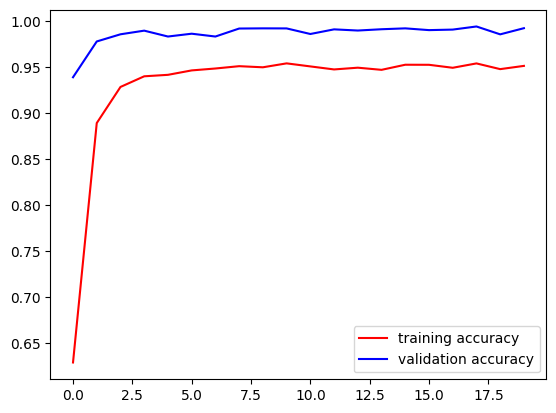

In [21]:
plt.plot(history.history['accuracy'], label = 'training accuracy', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy', color = 'blue')

plt.legend()
plt.show()

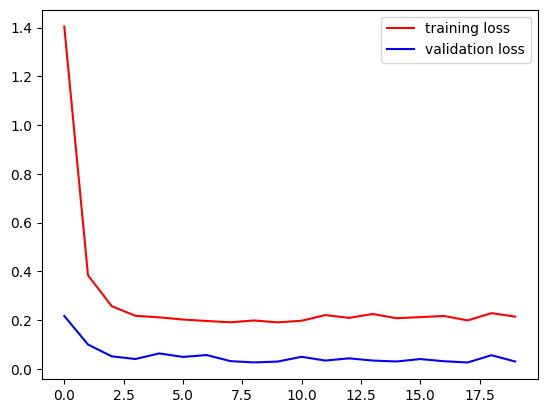

In [22]:
plt.plot(history.history['loss'], label = 'training loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'validation loss', color = 'blue')

plt.legend()
plt.show()

In [23]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test, label

In [24]:
X_test, label = testing('Test.csv')

In [26]:
y_pred = model.predict(X_test)
y_pred

395/395 [==============================] - 2s 5ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2293095e-35, 1.0000000e+00, 4.8343095e-35, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.3699675e-02, 9.1231531e-01, 3.1636231e-02, ..., 3.0543839e-07,
        1.3105728e-08, 5.3396912e-11],
       [7.6275392e-27, 2.7310425e-11, 1.0592647e-13, ..., 2.9410606e-19,
        0.0000000e+00, 1.3373811e-22],
       [0.0000000e+00, 2.1835532e-28, 3.7375081e-25, ..., 3.9269567e-26,
        0.0000000e+00, 3.6077834e-28]], dtype=float32)

In [30]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_pred

395/395 [==============================] - 1s 3ms/step


array([16,  1, 38, ...,  1,  7, 10])

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, y_pred))

0.956769596199525


In [32]:
model.save("final_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from keras.models import load_model
model = load_model('final_model.h5')

In [34]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [40]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    #y_pred = model.predict(X_test)
    y_pred = np.argmax(model.predict(X_test), axis = 1)
    return image, y_pred

1/1 [==============================] - 0s 26ms/step
Predicted traffic sign is:  Speed limit (30km/h)


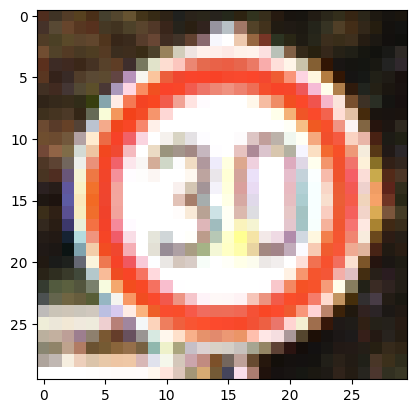

In [45]:
plot,prediction = test_on_img('/content/test/00024.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()